In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
tempo = pd.read_csv("/content/weatherHistory.csv", index_col=False, header=None, squeeze=True)
display(tempo)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11
0,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222222222221,7.3888888888888875,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
3,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284000000000003,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
4,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28888888888889,5.944444444444446,0.83,14.1036,269.0,15.826300000000002,0.0,1016.41,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96449,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.0167,26.0167,0.43,10.9963,31,16.1,0,1014.36,Partly cloudy starting in the morning.
96450,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.5833,24.5833,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96451,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.0389,22.0389,0.56,8.9838,30,16.1,0,1015.66,Partly cloudy starting in the morning.
96452,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.5222,21.5222,0.6,10.5294,20,16.1,0,1015.95,Partly cloudy starting in the morning.


In [4]:
t = tempo
t = t.drop(columns=0)
t.columns = t.iloc[0]
t = t.drop(0)
t = t.dropna(axis=0)
t['Precip Type'] = t['Precip Type'].str.replace('rain','0')
t['Precip Type'] = t['Precip Type'].str.replace('snow','1')
t

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,Partly Cloudy,0,9.472222222222221,7.3888888888888875,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
2,Partly Cloudy,0,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
3,Mostly Cloudy,0,9.377777777777778,9.377777777777778,0.89,3.9284000000000003,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
4,Partly Cloudy,0,8.28888888888889,5.944444444444446,0.83,14.1036,269.0,15.826300000000002,0.0,1016.41,Partly cloudy throughout the day.
5,Mostly Cloudy,0,8.755555555555553,6.977777777777779,0.83,11.0446,259.0,15.826300000000002,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96449,Partly Cloudy,0,26.0167,26.0167,0.43,10.9963,31,16.1,0,1014.36,Partly cloudy starting in the morning.
96450,Partly Cloudy,0,24.5833,24.5833,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96451,Partly Cloudy,0,22.0389,22.0389,0.56,8.9838,30,16.1,0,1015.66,Partly cloudy starting in the morning.
96452,Partly Cloudy,0,21.5222,21.5222,0.6,10.5294,20,16.1,0,1015.95,Partly cloudy starting in the morning.


In [5]:
t["Precip Type"] = t["Precip Type"].astype(str).astype(float)
t["Precip Type"] = t["Precip Type"].astype(int)
t["Temperature (C)"] = t["Temperature (C)"].astype(str).astype(float)
t["Apparent Temperature (C)"] = t["Apparent Temperature (C)"].astype(str).astype(float)
t["Humidity"] = t["Humidity"].astype(str).astype(float)
t["Wind Speed (km/h)"] = t["Wind Speed (km/h)"].astype(str).astype(float)
t["Wind Bearing (degrees)"] = t["Wind Bearing (degrees)"].astype(str).astype(float)
t["Visibility (km)"] = t["Visibility (km)"].astype(str).astype(float)
t["Loud Cover"] = t["Loud Cover"].astype(str).astype(float)
t["Pressure (millibars)"] = t["Pressure (millibars)"].astype(str).astype(float)

In [6]:
t

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
3,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
4,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
5,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96449,Partly Cloudy,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96450,Partly Cloudy,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96451,Partly Cloudy,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96452,Partly Cloudy,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## Número 1

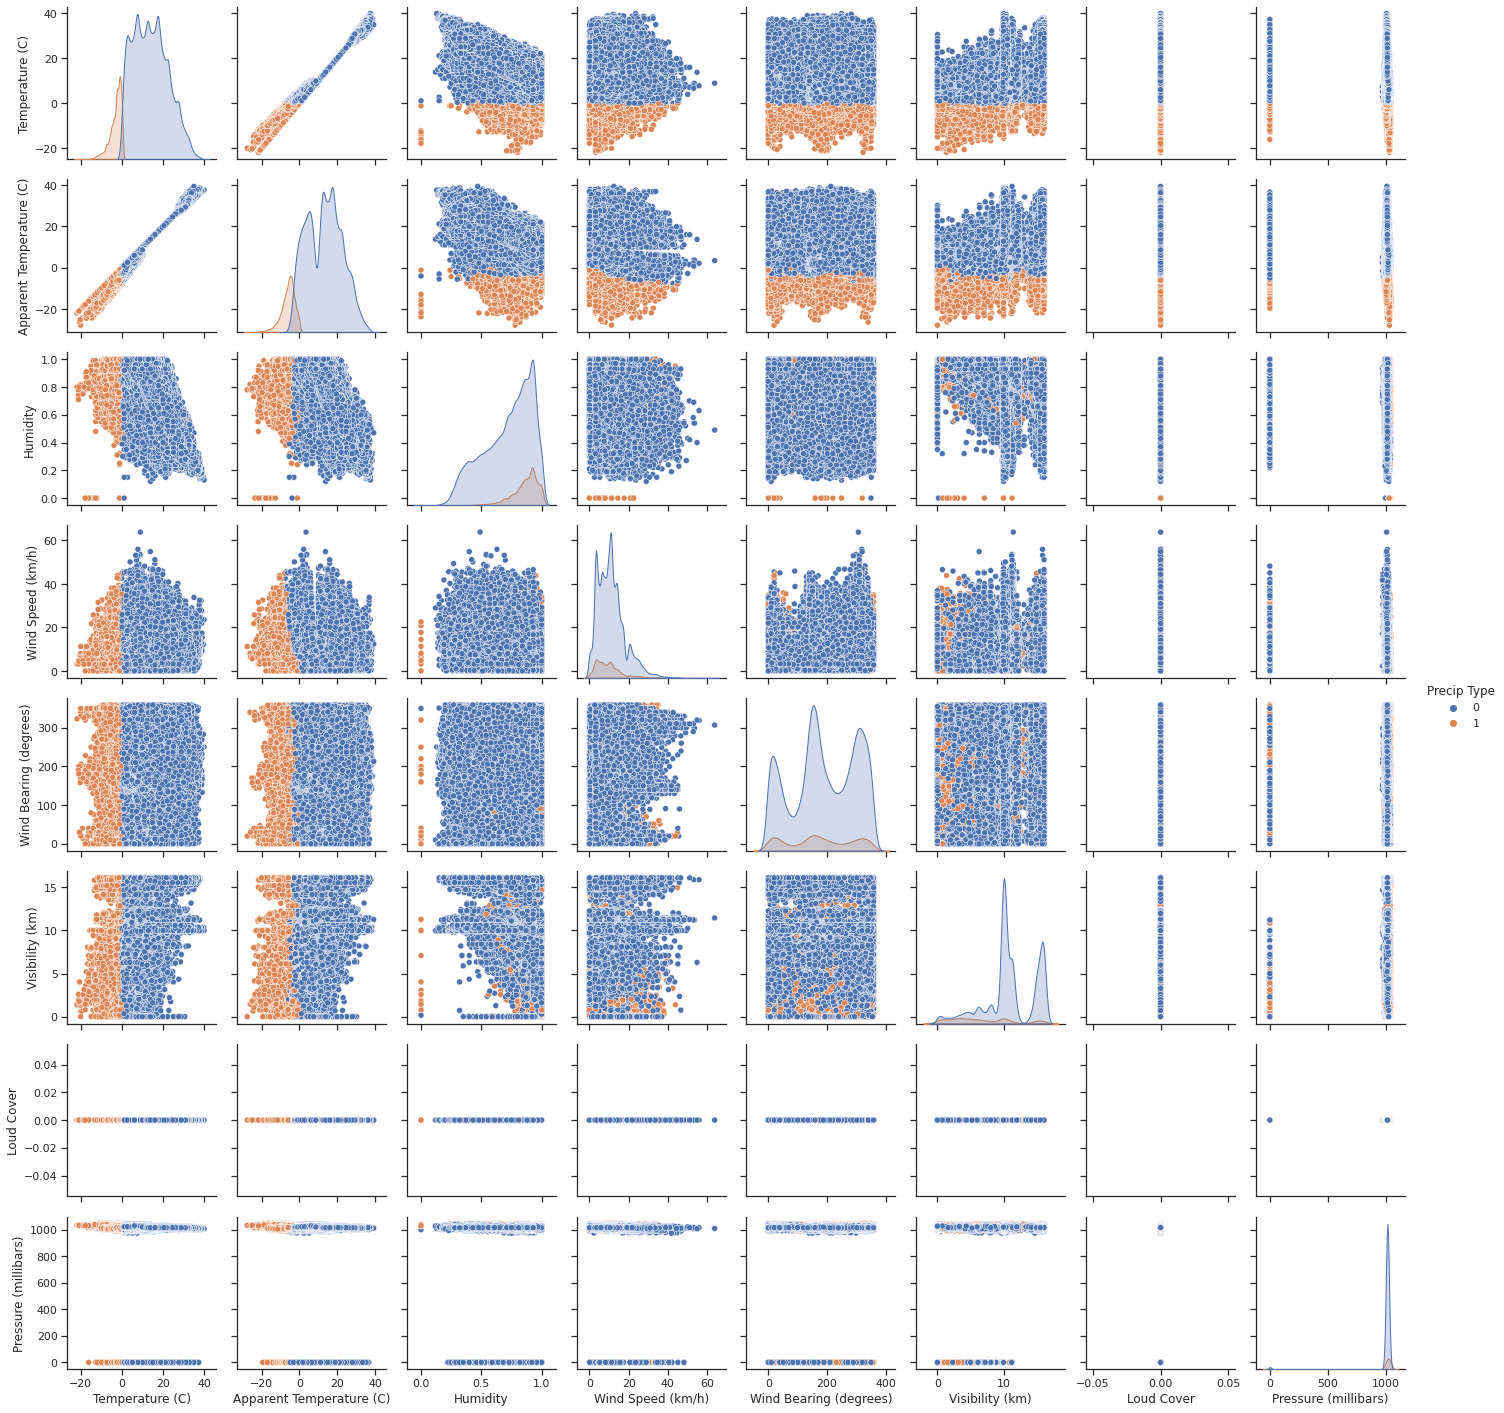

In [ ]:
sns.set(style="ticks")
sns.pairplot(t.iloc[:, 1:10], hue="Precip Type")
plt.show()

In [7]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(t.iloc[:, 2:10])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
np.set_printoptions(suppress=True)
print(k_means.cluster_centers_.round(3))
t.groupby('Precip Type').mean()

[[  11.958   10.886    0.735   10.778  187.437   10.397    0.    1016.801]
 [  10.706    9.133    0.73    12.756  193.51     7.794    0.      -0.   ]]


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Precip Type,,,,,,,,
0,13.853,13.013,0.719,10.971,189.123,10.831,0.000,1002.765
1,-3.271,-6.250,0.863,9.482,174.754,6.637,0.000,1006.217


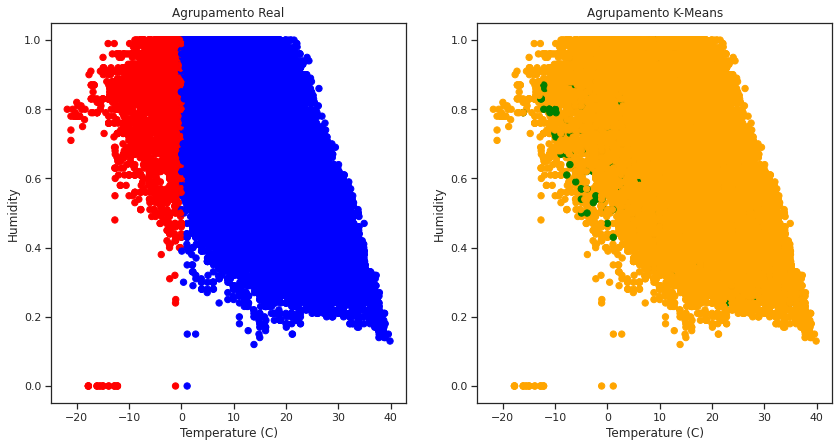

In [ ]:
plt.figure(figsize=(14,7))

colormap_real = np.array(['blue', 'red'])
colormap_group = np.array(['orange', 'green'])

plt.subplot(1,2,1)
plt.scatter(x=t["Temperature (C)"], y=t["Humidity"], c=colormap_real[t["Precip Type"]], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

plt.subplot(1,2,2)
plt.scatter(x=t['Temperature (C)'], y=t['Humidity'], c=colormap_group[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

plt.show()


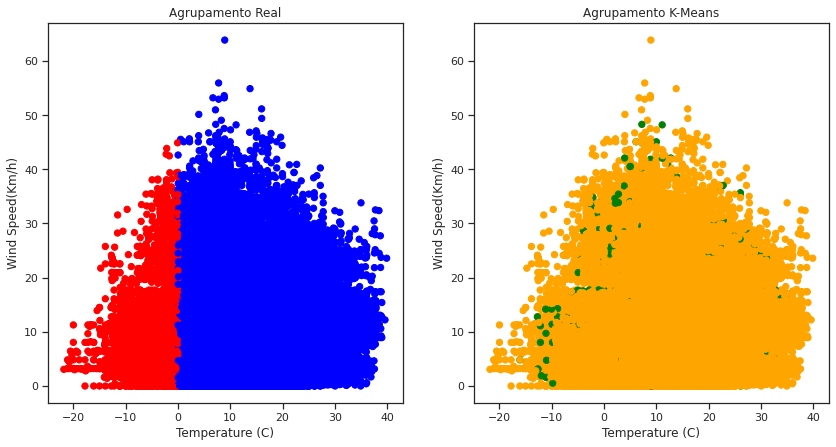

In [ ]:
plt.figure(figsize=(14,7))

colormap_real = np.array(['blue', 'red'])
colormap_group = np.array(['orange', 'green'])

plt.subplot(1,2,1)
plt.scatter(x=t["Temperature (C)"], y=t["Wind Speed (km/h)"], c=colormap_real[t["Precip Type"]], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed(Km/h)')

plt.subplot(1,2,2)
plt.scatter(x=t['Temperature (C)'], y=t["Wind Speed (km/h)"], c=colormap_group[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed(Km/h)')

plt.show()

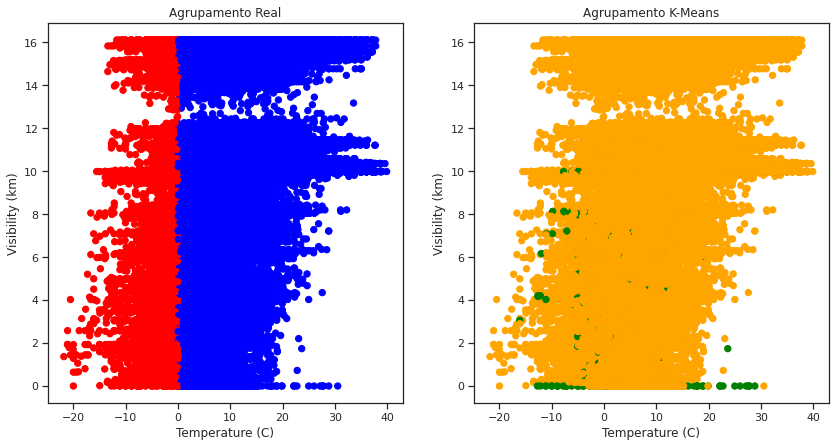

In [ ]:
plt.figure(figsize=(14,7))

colormap_real = np.array(['blue', 'red'])
colormap_group = np.array(['orange', 'green'])

plt.subplot(1,2,1)
plt.scatter(x=t["Temperature (C)"], y=t["Visibility (km)"], c=colormap_real[t["Precip Type"]], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')

plt.subplot(1,2,2)
plt.scatter(x=t['Temperature (C)'], y=t["Visibility (km)"], c=colormap_group[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')

plt.show()

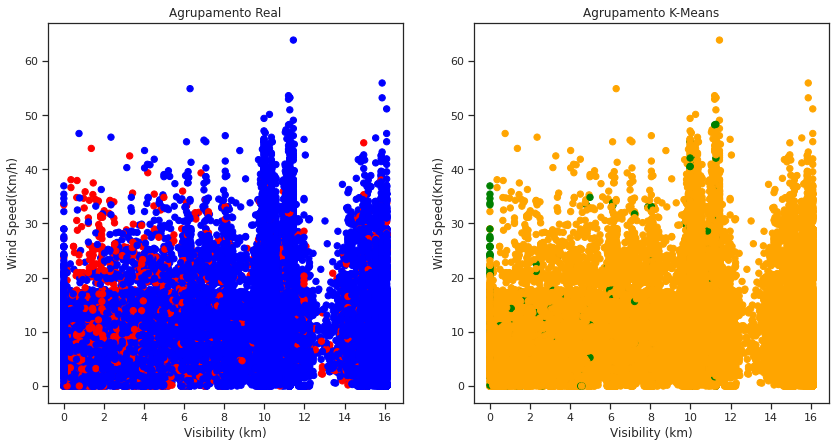

In [ ]:
plt.figure(figsize=(14,7))

colormap_real = np.array(['blue', 'red'])
colormap_group = np.array(['orange', 'green'])

plt.subplot(1,2,1)
plt.scatter(x=t["Visibility (km)"], y=t["Wind Speed (km/h)"], c=colormap_real[t["Precip Type"]], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Visibility (km)')
plt.ylabel('Wind Speed(Km/h)')

plt.subplot(1,2,2)
plt.scatter(x=t['Visibility (km)'], y=t["Wind Speed (km/h)"], c=colormap_group[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Visibility (km)')
plt.ylabel('Wind Speed(Km/h)')

plt.show()

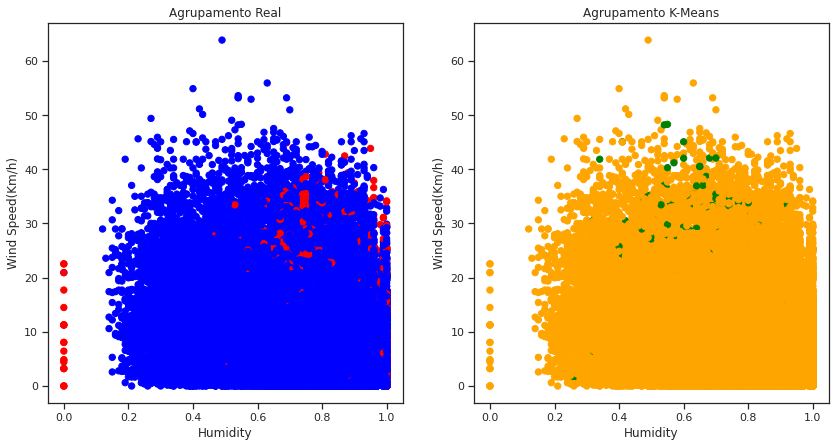

In [ ]:
plt.figure(figsize=(14,7))

colormap_real = np.array(['blue', 'red'])
colormap_group = np.array(['orange', 'green'])

plt.subplot(1,2,1)
plt.scatter(x=t["Humidity"], y=t["Wind Speed (km/h)"], c=colormap_real[t["Precip Type"]], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed(Km/h)')

plt.subplot(1,2,2)
plt.scatter(x=t['Humidity'], y=t["Wind Speed (km/h)"], c=colormap_group[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed(Km/h)')

plt.show()

## Número 2

Não é possível fazer essa associação, pois o algoritmo apresentou uma performance muito ruim para o conjunto de dados escolhido.

## Número 3

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

k_means = KMeans(n_clusters=2, random_state=1).fit(t.iloc[:, 2:10])
labels = k_means.labels_
metrics.silhouette_score(t.iloc[:, 2:10], labels, metric='euclidean')

0.8752864317588724

Apesar do alto valor para o k_means, o algoritmo não foi capaz de separar corretamente os grupos conforme o esperado.